# Maximizing the Success of a Movie Launch on a Streaming Platform
As a business analyst at a leading streaming company, you are tasked with providing insights to ensure the successful launch of the company’s first original movie for its English-language viewers. The goal is not only to drive viewership but also to understand the target audience better, which will help attract relevant advertisers.

In [151]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./streaming-data/streaming_viewership_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6214 entries, 0 to 6213
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     6214 non-null   object 
 1   Session_ID                  6214 non-null   object 
 2   Device_ID                   6214 non-null   int64  
 3   Video_ID                    6214 non-null   int64  
 4   Duration_Watched (minutes)  6214 non-null   float64
 5   Genre                       6214 non-null   object 
 6   Country                     6214 non-null   object 
 7   Age                         6214 non-null   int64  
 8   Gender                      6214 non-null   object 
 9   Subscription_Status         6214 non-null   object 
 10  Ratings                     6214 non-null   int64  
 11  Languages                   6214 non-null   object 
 12  Device_Type                 6214 non-null   object 
 13  Location                    6214 

### Metadata:

User_ID: Unique Identifier for the User.\
Session_ID: Unique Identifier for the Session. A session is assumed to be started when a view clicks on a video. Each seperate video watched by the same user counts as a different session.\
Device_ID: Identifier for the device used by the user.\
Video_ID: Identifier for the video content being viewed.\
Duration_Watched: The amount of time (in minutes) the user spent watching the video.\
Genre: The genre of the video content (Action, Comedy, Drama, Thriller, Sci-Fi).\
Subscription_Status: The user's subscription status (Free, Premium).\
Ratings: The user's rating or feedback for the content (1 to 5).\
Languages: The language of the content being viewed.\
Device_Type: The type of device used by the user (Smartphone, Tablet, Smart TV, Desktop, Laptop).\
Location: The location or city where the interaction event occurred.\
Playback_Quality: The quality of video playback (HD, SD, 4K).\
Interaction_Events: The count of interaction events that occurred during the user's session (e.g., clicks, likes, shares, etc.).\

### Check if data needs to be cleaned

In [152]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns].corr()


,Device_ID,Video_ID,Duration_Watched (minutes),Age,Ratings,Interaction_Events
Device_ID,1.000000,0.002833,0.006892,0.003308,0.012609,0.022148
Video_ID,0.002833,1.000000,0.007713,0.004196,-0.003179,0.011832
Duration_Watched (minutes),0.006892,0.007713,1.000000,0.000845,0.010902,-0.012278
Age,0.003308,0.004196,0.000845,1.000000,0.008028,0.006368
Ratings,0.012609,-0.003179,0.010902,0.008028,1.000000,-0.008162
Interaction_Events,0.022148,0.011832,-0.012278,0.006368,-0.008162,1.000000


In [153]:
df.duplicated().value_counts()

False    6214
Name: count, dtype: int64

In [154]:
df["User_ID"].value_counts()

User_ID
eb4f9229-74df-45f6-baac-cf19241b8b30    1
a42adb04-f400-4fbe-bfb5-fcf7742b7aca    1
dde847d5-3de4-44c5-84d8-9f74b7c8c33a    1
39467eae-9215-4f9f-99d4-670a0e829340    1
65ccbaf8-7bf0-4baa-9a31-b86d598ca148    1
                                       ..
0ea84d41-4260-4fb8-8094-557f354dc71d    1
3997a80f-b77d-4b31-b484-5577dd511281    1
3ec2890a-1699-450d-889f-46140a1eb4fd    1
2103a156-abbc-4870-a4ca-d2f6bb0e90ab    1
16e0315a-4993-4ce0-a098-340ea5997f3f    1
Name: count, Length: 6214, dtype: int64

In [155]:
df["Session_ID"].value_counts()

Session_ID
cb2142a7-0750-49ed-b8ac-a975fe1ff69a    1
107c28c0-f2b2-4b89-99fa-082c39903836    1
9624661b-e54f-471d-94c4-56cf12e42cbf    1
38580cc0-75d0-4e0d-b3a3-3e29c9d80676    1
7da18d8f-9d6f-4604-966c-2e8c6091fc30    1
                                       ..
47c76509-98a6-4634-ba04-8e434ea8738b    1
5faf415f-3d79-4399-85c0-2805e70da874    1
5c366ae1-c615-4565-8ad4-171b6d5dc71a    1
200efd90-5a1e-4a46-ace1-f90048546b07    1
83c2ee3b-ceef-4735-a64f-3eeac96ecbf5    1
Name: count, Length: 6214, dtype: int64

In [156]:
df.describe()

,Device_ID,Video_ID,Duration_Watched (minutes),Age,Ratings,Interaction_Events
count,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000
mean,496.762150,50.323785,60.378389,39.665594,2.987448,50.776794
std,287.681163,28.671178,34.597273,17.571317,1.403304,29.009363
min,1.000000,1.000000,0.055809,10.000000,1.000000,0.000000
25%,248.000000,26.000000,30.413538,24.000000,2.000000,26.000000
50%,493.500000,50.000000,60.765637,40.000000,3.000000,51.000000
75%,742.000000,75.000000,90.874141,55.000000,4.000000,76.000000
max,1000.000000,100.000000,119.999972,70.000000,5.000000,100.000000


Observing the shape of the data, there are some possible outliers at bottom percentile of duration watched that may have been misclicks. Otherwise, unique values are unique, other measured values are within a reasonable range, and there are no null values. One thing to note of interest is that a user is only ever represented in the dataset once, and tied to one instance of a session.

In [157]:
#Remove all rows that have a duration_watched of less than 10 seconds
df = df[df["Duration_Watched (minutes)"] >= 0.1]
df.describe()

,Device_ID,Video_ID,Duration_Watched (minutes),Age,Ratings,Interaction_Events
count,6208.000000,6208.000000,6208.000000,6208.000000,6208.000000,6208.000000
mean,496.846005,50.328930,60.436670,39.670909,2.986630,50.773679
std,287.677920,28.664783,34.563129,17.575663,1.403113,29.017589
min,1.000000,1.000000,0.110173,10.000000,1.000000,0.000000
25%,248.000000,26.000000,30.495917,24.000000,2.000000,26.000000
50%,493.500000,50.000000,60.841600,40.000000,3.000000,51.000000
75%,742.000000,75.000000,90.898569,55.000000,4.000000,76.000000
max,1000.000000,100.000000,119.999972,70.000000,5.000000,100.000000


### Different metrics for success:

Highly rated, total watch time, number of viewers

### Data Exploration

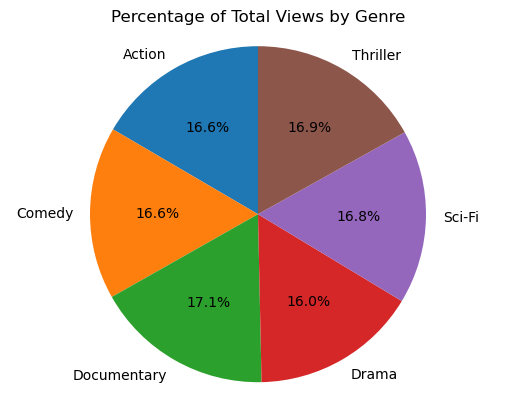

In [ ]:
#Total Views
total_views_by_genre = df.groupby('Genre').size()
percentage_views = total_views_by_genre / total_views_by_genre.sum() * 100
plt.pie(percentage_views, labels=total_views_by_genre.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of Total Views by Genre')
plt.show()


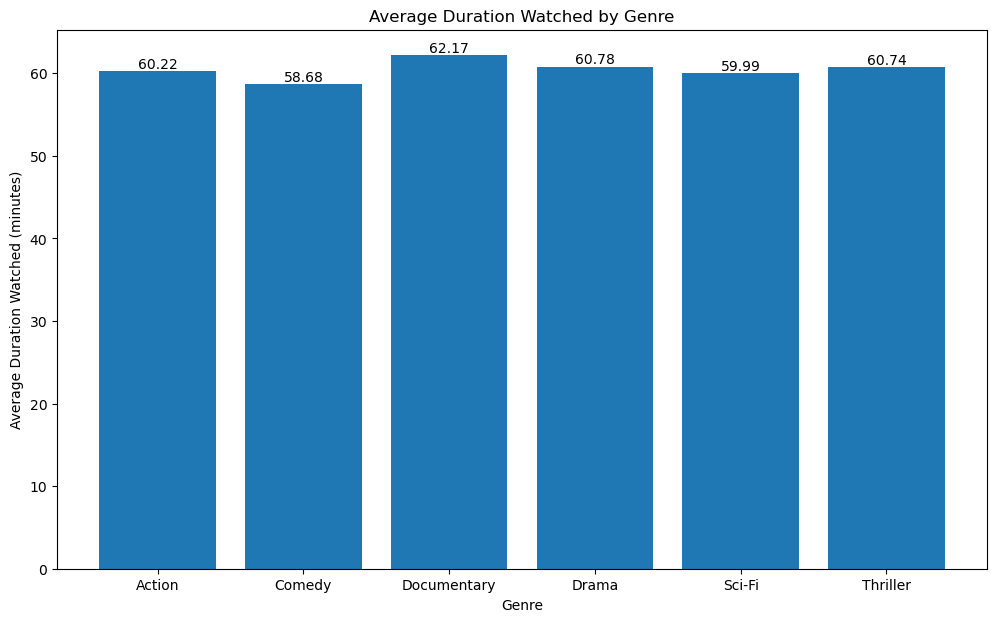

In [158]:
#Average Duration Watched Per Viewer
average_duration_by_genre = df.groupby('Genre')['Duration_Watched (minutes)'].mean()
plt.figure(figsize=(12, 7))
bars = plt.bar(average_duration_by_genre.index, average_duration_by_genre.values)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.xlabel('Genre')
plt.ylabel('Average Duration Watched (minutes)')
plt.title('Average Duration Watched by Genre')
plt.show()

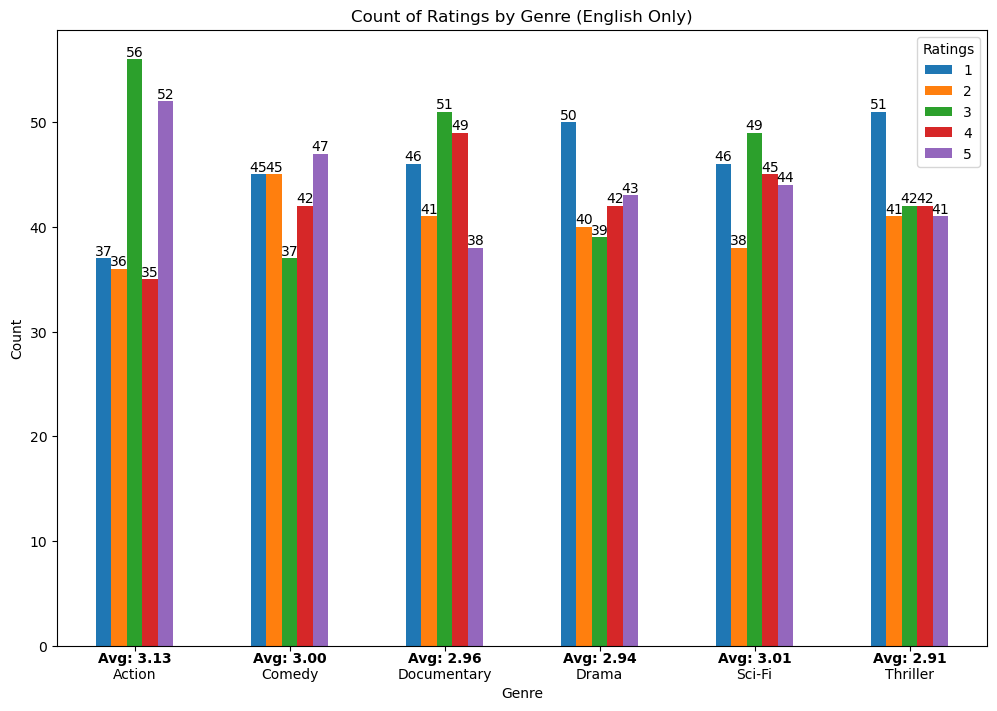

In [159]:
df_english = df[df['Languages'] == 'English']

grouped_df = df_english.groupby(['Genre', 'Ratings']).size().reset_index(name='Count')

pivot_df = grouped_df.pivot(index='Genre', columns='Ratings', values='Count')

ax = pivot_df.plot(kind='bar', figsize=(12, 8))

for container in ax.containers:
    ax.bar_label(container)

average_ratings = df_english.groupby('Genre')['Ratings'].mean()

for idx, row in average_ratings.reset_index().iterrows():
    genre = row['Genre']
    avg_rating = row['Ratings']
    ax.text(idx, -0.5, f'Avg: {avg_rating:.2f}', ha='center', va='top', color='black', weight='bold')
ax.tick_params(axis='x', labelrotation=0, pad=12)

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count of Ratings by Genre (English Only)')
plt.legend(title='Ratings')
plt.show()

After checking the keystone metrics outlined earlier of viewers, duration watched, and ratings.

Total views: 1. Documentary, 2. Thriller, 3. Sci-Fi, 5. Comedy, Action, 6. Drama

Average Duration Watched: 1. Documentary, 2. Thriller, 3. Drama, 4. Action, 5. Sci-Fi, 6. Comedy

Ratings: 1. Action, 2. Comedy, 3. Sci-Fi, 4. Documentary, 5. Drama, 6. Thriller 

In [160]:
genre_rankings=pd.DataFrame(data={'genre':['Documentary','Thriller','Sci-Fi','Comedy','Action','Drama'],'total_views':[1,2,3,5,5,6],'avg_duration_watched':[1,2,5,6,4,3], 'avg_rating':[4,6,3,2,1,5]})
genre_rankings

,genre,total_views,avg_duration_watched,avg_rating
0,Documentary,1,1,4
1,Thriller,2,2,6
2,Sci-Fi,3,5,3
3,Comedy,5,6,2
4,Action,5,4,1
5,Drama,6,3,5


In [161]:
genre_rankings['avg_ranking']=genre_rankings[['total_views','avg_duration_watched','avg_rating']].mean(axis=1)
genre_rankings

,genre,total_views,avg_duration_watched,avg_rating,avg_ranking
0,Documentary,1,1,4,2.000000
1,Thriller,2,2,6,3.333333
2,Sci-Fi,3,5,3,3.666667
3,Comedy,5,6,2,4.333333
4,Action,5,4,1,3.333333
5,Drama,6,3,5,4.666667


Assuming all three metrics are equally as important, Documentary is the best choice of a movie.
 
Now we will explore demographic data, specifically gender and age groups, for documentary watchers to see how to direct marketing efforts.

C:\Users\hyoon\AppData\Local\Temp\ipykernel_30280\1809190994.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ratings_by_demo = df_demo.groupby(['Age_Group','Gender'])['Ratings'].mean().reset_index().set_index(['Age_Group', 'Gender'])['Ratings']


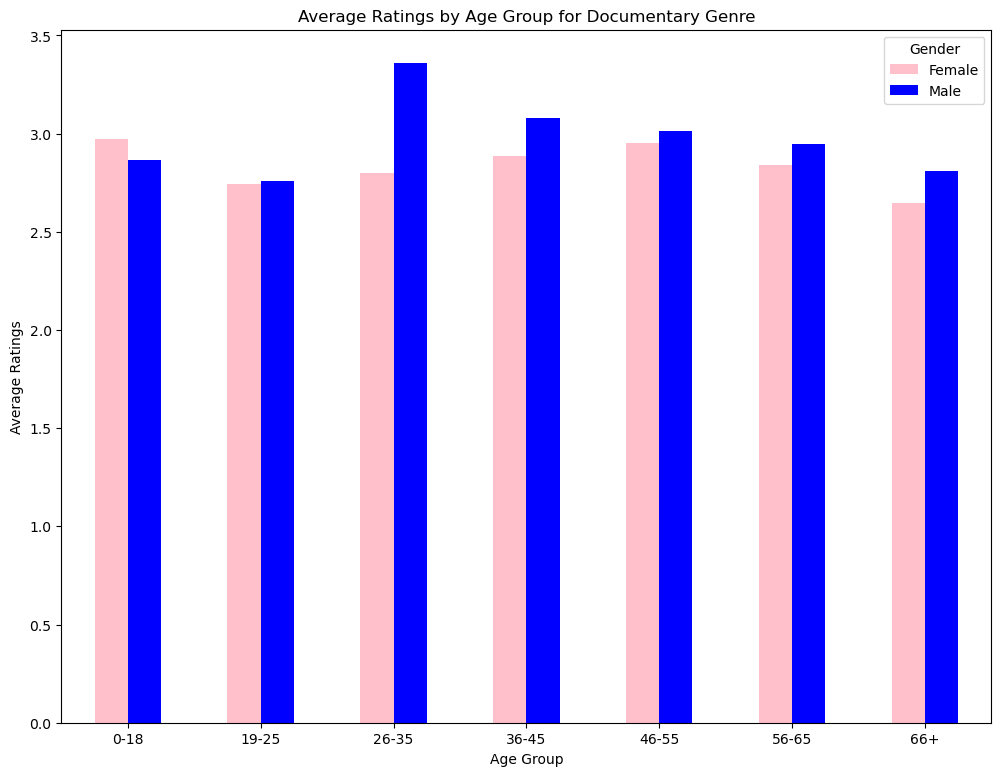

In [162]:
df_demo = df.loc[df["Genre"] == "Documentary", ["Age", "Ratings", "Duration_Watched (minutes)", "Gender"]]
age_bins = [0, 18, 25, 35, 45, 55, 65, 150]
age_labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']

# Create age groups
df_demo['Age_Group'] = pd.cut(df_demo['Age'], bins=age_bins, labels=age_labels, right=False)
average_ratings_by_demo = df_demo.groupby(['Age_Group','Gender'])['Ratings'].mean().reset_index().set_index(['Age_Group', 'Gender'])['Ratings']
ax=average_ratings_by_demo.unstack().plot(kind='bar', figsize=(12, 9), color=['pink', 'blue'])
plt.xticks(rotation=0)
plt.xlabel('Age Group')
plt.ylabel('Average Ratings')
plt.title('Average Ratings by Age Group for Documentary Genre')
plt.legend(title='Gender')
plt.show()

C:\Users\hyoon\AppData\Local\Temp\ipykernel_30280\709125005.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_duration_by_demo = df_demo.groupby(['Age_Group','Gender'])['Duration_Watched (minutes)'].mean().reset_index().set_index(['Age_Group', 'Gender'])['Duration_Watched (minutes)']


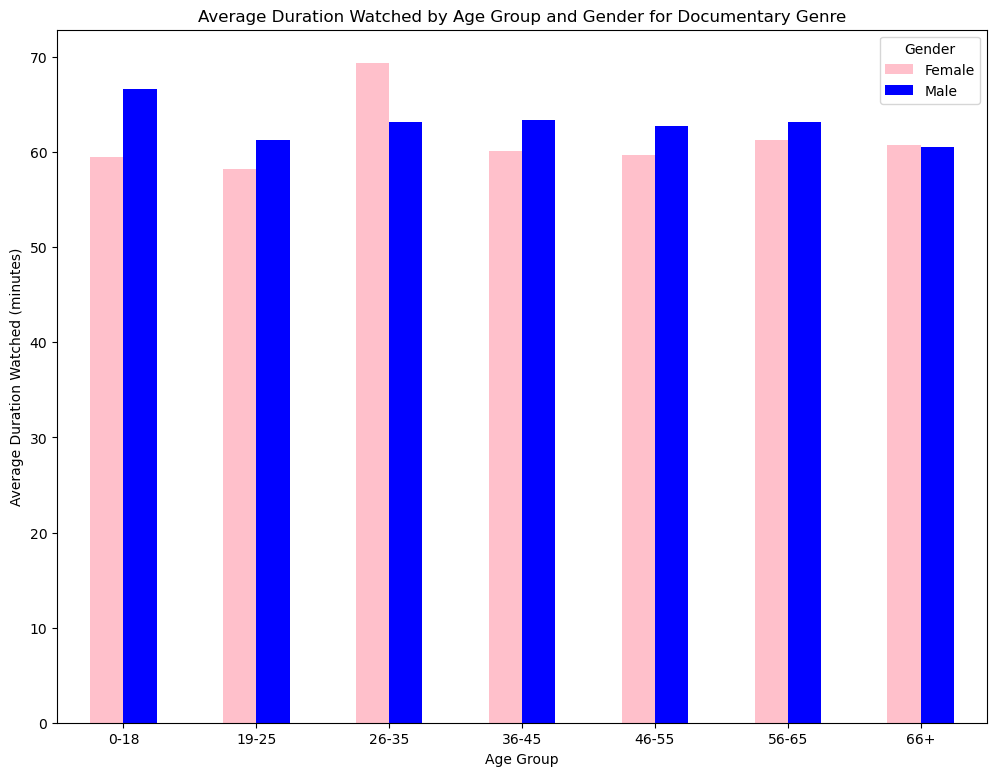

In [163]:
average_duration_by_demo = df_demo.groupby(['Age_Group','Gender'])['Duration_Watched (minutes)'].mean().reset_index().set_index(['Age_Group', 'Gender'])['Duration_Watched (minutes)']
ax = average_duration_by_demo.unstack().plot(kind='bar', figsize=(12, 9), color=['pink','blue'])
plt.xticks(rotation=0)
plt.xlabel('Age Group')
plt.ylabel('Average Duration Watched (minutes)')
plt.title('Average Duration Watched by Age Group and Gender for Documentary Genre')
plt.legend(title='Gender')
plt.show()

C:\Users\hyoon\AppData\Local\Temp\ipykernel_30280\2946506609.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_counts = df_demo.groupby(['Age_Group',"Gender"]).size()


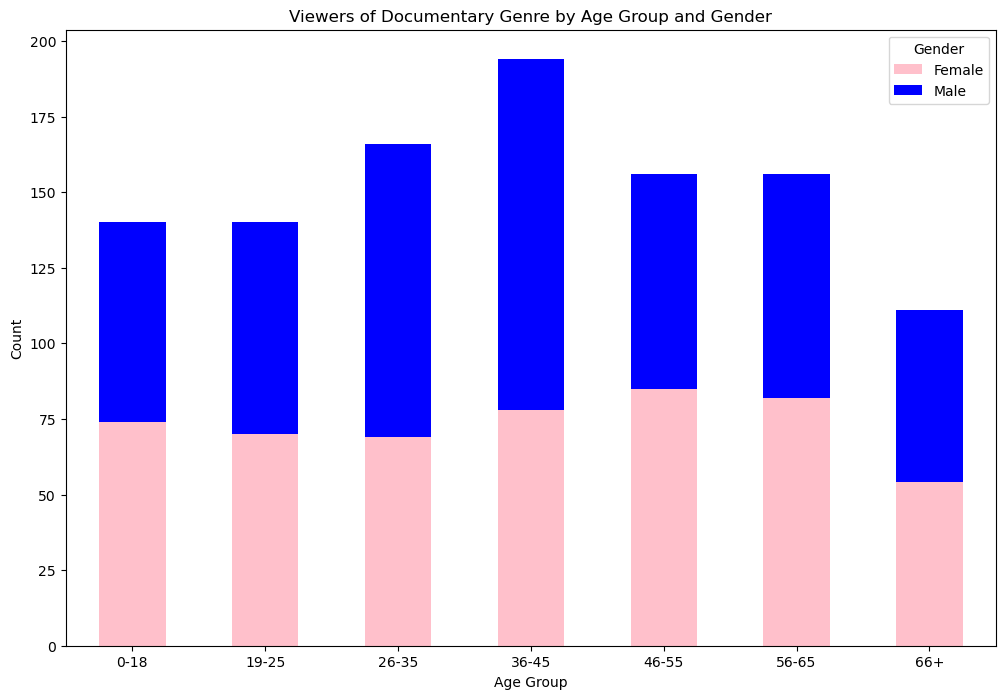

In [164]:

gender_counts = df_demo.groupby(['Age_Group',"Gender"]).size()
gender_counts.unstack().plot(kind='bar', stacked=True, figsize=(12, 8), color=['pink','blue'])
plt.xticks(rotation=0)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Viewers of Documentary Genre by Age Group and Gender')
plt.legend(title='Gender')
plt.show()

From the results, we can see that the 36-45 age group has the largest viewership count overall and for males, while having top 3 viewship numbers for females. Users in the 26-35 age group had the longest average duration watched for females, as well as overall while users in the 26-35 age group had the highest average rating for males. It also seems that accross all three categories, males have better metrics for documentaries.

### Takeaways

Based on the data, a documentary targeted towards millenial (ages 26-45) males will have the highest chance of being successful based on ratings, viewership, and duration watched all being considered. An example of a successful documentary that fits this description would be "The Last Dance," a sports documentary that followed Michael Jordan's last championship run on the Chicago Bulls. A documentary on other sports icons such as Tom Brady would be a proven way to hit the desired demographic. Other considerations that should be considered when making decisions is whether or not higher ratings, viewership, and duration watched are metrics that actually translates to inceased retention or total users, which is ultimately the end goal of creating the content. Another important consideration would be to look at costs associated with each genre of movie to decide the most budget-friendly option to go with as well.
